# Breast Cancer Data Analysis with SVM and Perceptron

In this project I will analyze the Sklearn Breast Cancer dataset using Soft Margin SVM and Perceptron algorithms.

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
from tabulate import tabulate

# Soft margin SVM
### About the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label that is called target. We should find a proper hyperplane that separates malignant and benign samples.
The original dataset labels is 0 and 1 and in the following code boxes we change it to -1 and 1.

In [47]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [48]:
cancer.target = np.where(cancer.target==0, -1, cancer.target) 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

71.8804920913884 %
71.8804920913884 %
20.035149384885763 %
20.035149384885763 %
8.084358523725834 %
8.084358523725834 %


### soft margin SVM optimization:<br/>
We add 1 at the beginning of each Xs data (X_train, X_val , ...) and then the bias will be calculated implicitly.
Then you should minimize the following SVM loss function (using gradient descent) with changing parameters of model.<br>
In this notation: 
\begin{equation}
x_i , y_i
\end{equation}
refers to feature vector of the sample and the label of our training data<br>
and this is SVM loss function:

\begin{equation}
\large
J(W) = \frac{1}{N} \sum_{i=1}^{N}{L^{(i)}} + \frac{\lambda}{2} ||W||^2\\
\large
L^{(i)} ={max(0, 1 - y_i(w^{T}x_i)})
\;\\
\end{equation} 


In [49]:
# >>>>>WARNING: RUN THIS CELL ONLY ONCE!<<<<<

# adding 1s to the end of feature vectors to be multiplied by bias term of weights
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape) 

(409, 31)
(46, 31)
(114, 31)


## SVM Implementation

In [5]:
class SVM:
    def __init__(self, n_features: int, std: float):
        """
        n_features: number of features in (or the dimension of) each instance
        std: standard deviation used in the initialization of the weights of svm
        """
        self.n_features = n_features
        self.w = np.random.normal(scale=std, size=n_features)
        

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        """
        X: training instances as a 2d-array with shape (num_train, n_features)
        y: labels corresponsing to the given training instances as a 1d-array with shape (num_train,)
        reg_coeff: L2-regularization coefficient
        """
        hinge_loss = np.maximum(0, 1 - y * np.dot(X, self.w))
        loss = np.sum(hinge_loss) / X.shape[0] + reg_coeff / 2 * np.linalg.norm(self.w) ** 2
        return loss
        
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        """
        Updates the weights of the svm using the gradient of computed loss with respect to the weights. 
        learning_rate: learning rate that will be used in gradient descent to update the weights
        """        
        loss = np.maximum(0, 1 - y * np.dot(X, self.w))
        loss_indicator = np.zeros(loss.shape)
        loss_indicator[loss > 0] = 1
        
        gradient = 0.0
        for i in range(X.shape[0]):
             gradient += reg_coeff * self.w - loss_indicator[i] * X[i] * y[i]    
        self.w = self.w - learning_rate * gradient / X.shape[0]

    def predict(self, X):
        """
        X: Numpy 2d-array of instances
        """
        y_pred = None
        y_pred = np.sign(np.dot(X, self.w))
        return y_pred


This cell contains our hyper parameters:

In [64]:
std = 0.0001
num_iters = 15000
reg_coeff = 20
learning_rate=1e-8
# learning rate for increasing loss
# learning_rate=0.1

In this cell using our SVM class, we want to train our model for cancer data:<br/>
In every iteration we should see the training loss decrease.

In [27]:
from sklearn.metrics import accuracy_score
model = SVM(n_features=X_train.shape[1], std= std )
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 1.051124, val acc 67.39%
iteration 100, loss 1.009181, val acc 8.70%
iteration 200, loss 0.967240, val acc 32.61%
iteration 300, loss 0.940460, val acc 32.61%
iteration 400, loss 0.933986, val acc 32.61%
iteration 500, loss 0.931771, val acc 32.61%
iteration 600, loss 0.930017, val acc 32.61%
iteration 700, loss 0.928324, val acc 32.61%
iteration 800, loss 0.926653, val acc 32.61%
iteration 900, loss 0.924987, val acc 32.61%
iteration 1000, loss 0.923332, val acc 32.61%
iteration 1100, loss 0.921681, val acc 32.61%
iteration 1200, loss 0.920031, val acc 32.61%
iteration 1300, loss 0.918381, val acc 32.61%
iteration 1400, loss 0.916731, val acc 32.61%
iteration 1500, loss 0.915081, val acc 32.61%
iteration 1600, loss 0.913431, val acc 32.61%
iteration 1700, loss 0.911782, val acc 32.61%
iteration 1800, loss 0.910132, val acc 32.61%
iteration 1900, loss 0.908482, val acc 32.61%
iteration 2000, loss 0.906833, val acc 32.61%
iteration 2100, loss 0.905183, val acc 32.61%
i

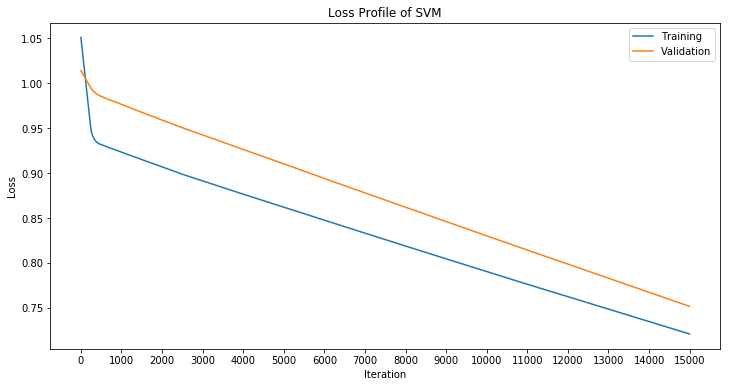

In [28]:
def plot_loss_profile(loss_history, loss_val_history):
    plt.figure(figsize=(12,6))
    plt.plot(range(0, num_iters), loss_history, label='Training')
    plt.plot(range(0, num_iters), loss_val_history, label='Validation')
    plt.xticks(np.arange(0, num_iters + 1, 1000))

    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend(loc='upper right')
    plt.title("Loss Profile of SVM")
    plt.show()       

In [ ]:
plot_loss_profile(loss_history, loss_val_history)

### Question 1:
With changing the hyper parameters, I found a configuration of hyper parameters that cause our loss to increase after each iteration and then reported that configuration in the next cell.

std = "0.0001" <br>
num_iters = "15000"<br>
reg_coeff = "20"<br>
learning_rate = "0.1"<br>

### Question 2:
#### The reason of this event<br> 
Answer:
َAs it can be seen in the plot below, if we increase the learning rate from $e^{-8}$ to 0.1 our losses will increase in each iteration and grow up to 7 * $e^{12}$. <br>
The learning rate is a parameter that determines how fast or slow we will move towards our optimal weights. The higher the learning rate, the bigger our steps towards the converged weight vector. Therefore, the reason for the divergence in the plot below is that a very large learning rate will make us skip the optimal solution and diverge from it in every step. Hence, our loss will increase at each step. 

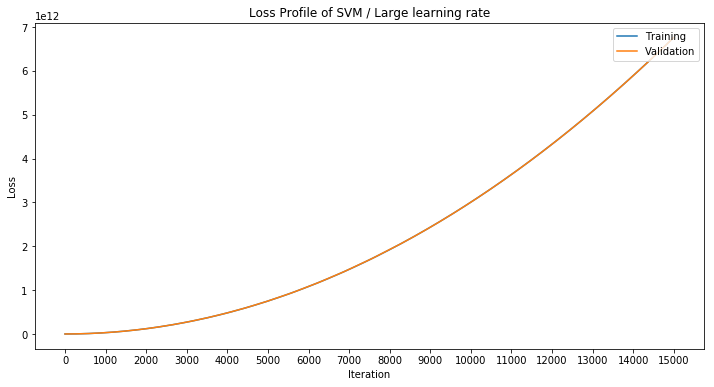

In [29]:
plot_loss_profile(loss_history, loss_val_history)

In [62]:
def confusion_matrix(y, y_pred):
    tp = np.count_nonzero((y_pred == 1) & (y == 1))
    fp = np.count_nonzero((y_pred == 1) & (y == -1))
    tn = np.count_nonzero((y_pred == -1) & (y == -1))
    fn = np.count_nonzero((y_pred == -1) & (y == 1)) 
    return tp, fp, tn, fn

In [29]:
val_preds =  model.predict(X_test)
tp, fp, tn, fn = confusion_matrix(y_test, val_preds)
print(tabulate([['Predicted Positive', tp, fp], ['Predicted Negative', fn, tn]], headers=['', 'Actually Positive', 'Actually Negative']))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy = ", accuracy)

                      Actually Positive    Actually Negative
------------------  -------------------  -------------------
Predicted Positive                   68                   13
Predicted Negative                    2                   31
Accuracy =  0.868421052631579


In the next part, we sample from training data with certain size (batch size) instead of using all the training data in each iteration, and train our model on batch data:

In [30]:
std = 0.0001
batch_size = 200
num_iters = 15000
reg_coeff = 20
learning_rate=1e-8
model = SVM(n_features=X_train.shape[1], std= std )

In [31]:
loss_history = []
loss_val_history = []
for it in range(num_iters):
    X_batch = None
    y_batch = None
    indices = np.random.choice(X_train.shape[0], batch_size, replace=True)
    X_batch = X_train[indices]
    y_batch = y_train[indices]
    loss = model.loss(X_batch, y_batch, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_batch, y_batch, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 1.011202, val acc 67.39%
iteration 100, loss 0.980154, val acc 32.61%
iteration 200, loss 0.964814, val acc 32.61%
iteration 300, loss 0.895913, val acc 32.61%
iteration 400, loss 0.938355, val acc 32.61%
iteration 500, loss 0.942577, val acc 32.61%
iteration 600, loss 0.996250, val acc 32.61%
iteration 700, loss 0.887043, val acc 32.61%
iteration 800, loss 0.923362, val acc 32.61%
iteration 900, loss 0.946127, val acc 32.61%
iteration 1000, loss 0.941733, val acc 32.61%
iteration 1100, loss 0.971160, val acc 32.61%
iteration 1200, loss 0.934622, val acc 32.61%
iteration 1300, loss 0.932602, val acc 32.61%
iteration 1400, loss 0.922570, val acc 32.61%
iteration 1500, loss 0.860475, val acc 32.61%
iteration 1600, loss 0.916371, val acc 32.61%
iteration 1700, loss 0.863175, val acc 32.61%
iteration 1800, loss 0.877719, val acc 32.61%
iteration 1900, loss 0.831454, val acc 32.61%
iteration 2000, loss 0.892192, val acc 32.61%
iteration 2100, loss 0.906416, val acc 32.61%


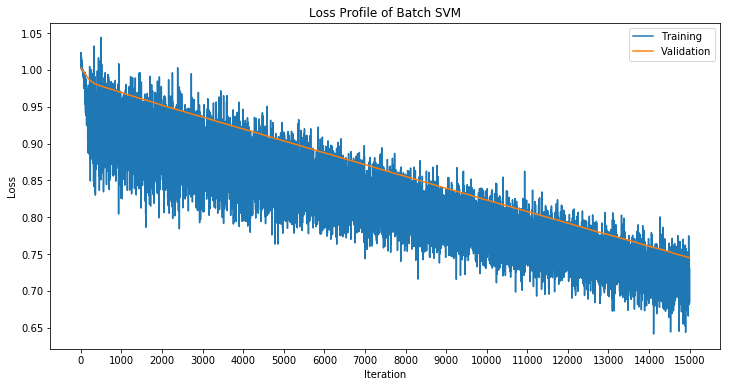

In [32]:
plot_loss_profile(loss_history, loss_val_history)

### Question 3:
Why we see fluctuations in this plot?<br>
Answer: When we use batch data in our training, we are updating the loss according to a sample of the data (not all of it) at each step. Therefore, each mislabeled data in a batch would affect the weight updates more (because each individual data will have a greater effect on the gradient when we use smaller batches) and can increase the overall loss at some iterations. As a result, the loss is thrown away from its local minimum occasionally. For a larger batch size, this effect and the fluctuations becomes less. 

# Perceptron

By now, you should know how to use and how to implement SVM from scratch.
In fact, for perceptron we can use premade functions as below:

In [58]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
val_preds = clf.predict(X_test)
print(confusion_matrix(y_test,val_preds,[1,-1]))
print('test acc %.2f%%' % (accuracy_score(y_test,val_preds) * 100)) 

[[60 13]
 [ 2 39]]
test acc 86.84%


### Perceptron Implementation

In [39]:
class Perceptron:
    def __init__(self, n_features: int, std: float):
        self.n_features = n_features
        self.w = np.random.normal(scale=std, size=n_features)
        

    def loss(self, X: np.ndarray, y: np.ndarray, reg_coeff: float):
        hinge_loss = np.maximum(0, 1 - y * np.dot(X, self.w)) 
        return np.sum(hinge_loss) / X.shape[0]

    
    def update_weights(self,  X: np.ndarray, y: np.ndarray, learning_rate: float , reg_coeff: float):
        for i in range(X.shape[0]): 
            loss = np.maximum(0, 1 - y * np.dot(X, self.w))
            loss_indicator = np.zeros(loss.shape)
            loss_indicator[loss > 0] = 1
            self.w = self.w + learning_rate * loss_indicator[i] * X[i] * y[i]

        
    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.w))
        return y_pred

In [53]:
# Hyper parameters

std = 0.0001
num_iters = 8000
learning_rate=1e-8

In [54]:
# Perceptron Training

from sklearn.metrics import accuracy_score
model = Perceptron(n_features=X_train.shape[1], std=std)
loss_history = []
loss_val_history = []
for it in range(num_iters):
    loss = model.loss(X_train, y_train, reg_coeff)
    loss_val = model.loss(X_val, y_val, reg_coeff)
    if it % 100 == 0:
        val_preds =  model.predict(X_val)
        print('iteration %d, loss %f, val acc %.2f%%' % (it, loss,  accuracy_score(y_val,val_preds) * 100))
    model.update_weights(X_train, y_train, learning_rate , reg_coeff)
    loss_history.append(loss)
    loss_val_history.append(loss_val)

iteration 0, loss 0.977668, val acc 39.13%
iteration 100, loss 0.429612, val acc 69.57%
iteration 200, loss 0.328337, val acc 76.09%
iteration 300, loss 0.286353, val acc 84.78%
iteration 400, loss 0.263137, val acc 91.30%
iteration 500, loss 0.248225, val acc 91.30%
iteration 600, loss 0.236785, val acc 91.30%
iteration 700, loss 0.228191, val acc 93.48%
iteration 800, loss 0.222310, val acc 91.30%
iteration 900, loss 0.218729, val acc 91.30%
iteration 1000, loss 0.215814, val acc 91.30%
iteration 1100, loss 0.213378, val acc 91.30%
iteration 1200, loss 0.211701, val acc 91.30%
iteration 1300, loss 0.209866, val acc 91.30%
iteration 1400, loss 0.208100, val acc 91.30%
iteration 1500, loss 0.206761, val acc 91.30%
iteration 1600, loss 0.205414, val acc 93.48%
iteration 1700, loss 0.204067, val acc 93.48%
iteration 1800, loss 0.203215, val acc 93.48%
iteration 1900, loss 0.202167, val acc 93.48%
iteration 2000, loss 0.201389, val acc 91.30%
iteration 2100, loss 0.200855, val acc 91.30%


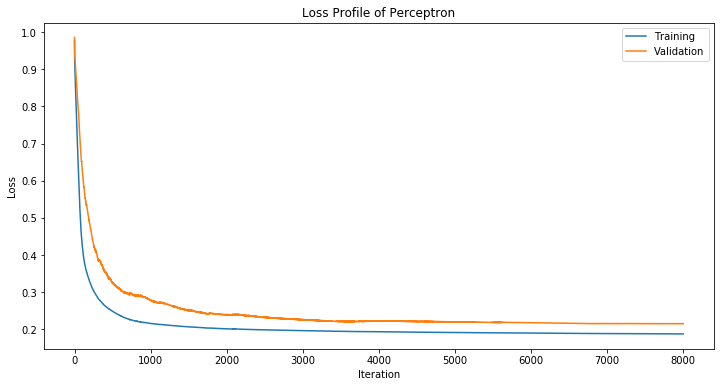

In [55]:
# Training/Validation loss plots

plot_loss_profile(loss_history, loss_val_history)

In [63]:
# Confusion Matrix & Accuracy

val_preds =  model.predict(X_test)
tp, fp, tn, fn = confusion_matrix(y_test, val_preds)
print(tabulate([['Predicted Positive', tp, fp], ['Predicted Negative', fn, tn]], headers=['', 'Actually Positive', 'Actually Negative']))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy = ", accuracy)

                      Actually Positive    Actually Negative
------------------  -------------------  -------------------
Predicted Positive                   60                    2
Predicted Negative                   13                   39
Accuracy =  0.868421052631579
